In [193]:
import pandas as pd 
import scipy as sc
import random as rd

In [194]:
data = pd.read_csv('train.csv')

In [195]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [196]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [198]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [199]:
data.drop('Cabin', axis=1, inplace=True)

In [200]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

<Axes: xlabel='Title'>

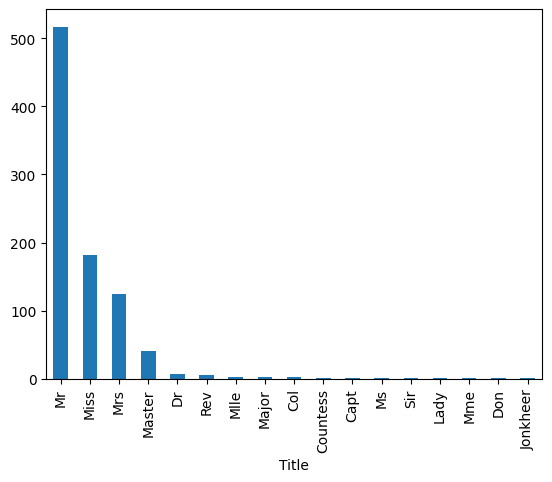

In [201]:
data.Title.value_counts().plot(kind='bar')

Text(0, 0.5, 'Age')

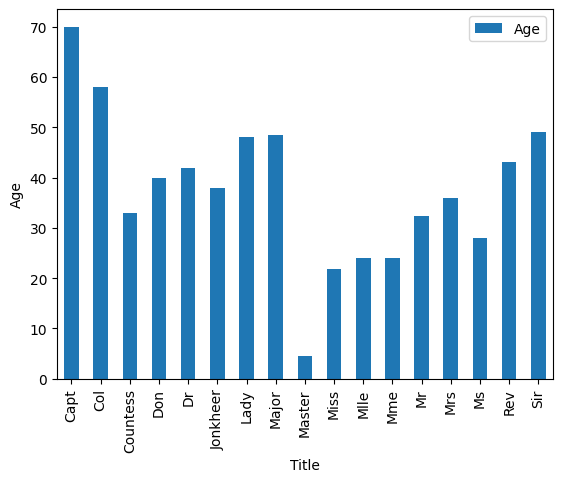

In [202]:
plt = data[['Age', 'Title']].groupby('Title').mean().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Age')

In [203]:
ageFiller=data[['Age', 'Title']].groupby('Title').mean().to_dict()
a=data['Title'].apply(lambda x: ageFiller["Age"][x])

In [204]:
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')

In [205]:
data['Title'] =data['Title'].map({'Master':0, 'Miss':1, 'Mr':2,'Mrs':3,'Others':4})

In [206]:
data.drop('Name', axis=1, inplace=True)

In [207]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [208]:
data['Embarked'].fillna(rd.randint(0,2), inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_113620\2863642445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(rd.randint(0,2), inplace=True)


In [209]:
data['Age'].fillna(a, inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_113620\1266340833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(a, inplace=True)


In [210]:
data['Ticket']=data['Ticket'].str.extract('(\d+)')

In [211]:
data['Ticket'].fillna(0, inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_113620\2705088372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ticket'].fillna(0, inplace=True)


In [212]:
data['Ticket']=data['Ticket'].astype('int')

In [213]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Embarked       float64
Title            int64
dtype: object


In [214]:
data.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.000000,1,0,5,7.2500,2.0,2
1,2,1,1,1,38.000000,1,0,17599,71.2833,0.0,3
2,3,1,3,1,26.000000,0,0,2,7.9250,2.0,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,2.0,3
4,5,0,3,0,35.000000,0,0,373450,8.0500,2.0,2
5,6,0,3,0,32.368090,0,0,330877,8.4583,1.0,2
6,7,0,1,0,54.000000,0,0,17463,51.8625,2.0,2
7,8,0,3,0,2.000000,3,1,349909,21.0750,2.0,0
8,9,1,3,1,27.000000,0,2,347742,11.1333,2.0,3
9,10,1,2,1,14.000000,1,0,237736,30.0708,0.0,3


In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
print(data['Survived'].head(50))
classes=data['Survived']
print(classes.head(10))
features=data.drop('Survived', axis=1)
print(features.head(10))
knn.fit(features, classes)

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    0
25    1
26    0
27    0
28    1
29    0
30    0
31    1
32    1
33    0
34    0
35    0
36    1
37    0
38    0
39    1
40    0
41    0
42    0
43    1
44    1
45    0
46    0
47    1
48    0
49    0
Name: Survived, dtype: int64
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64
   PassengerId  Pclass  Sex       Age  SibSp  Parch  Ticket     Fare  \
0            1       3    0  22.00000      1      0       5   7.2500   
1            2       1    1  38.00000      1      0   17599  71.2833   
2            3       3    1  26.00000      0      0       2   7.9250   
3            4       1    1  35.00000      1      0  113803  53.1000   
4            5       3    0  35.00000      0      0  373450   8.0500   
5            6       3    0  32.36809   

KNeighborsClassifier(n_neighbors=3)

In [216]:
test_set=pd.read_csv('test.csv')
test_set.describe()
test_set.drop('Cabin', axis=1, inplace=True)
test_set['Title'] = test_set.Name.str.extract('([A-Za-z]+)\.',expand=False)
ageFiller=test_set[['Age', 'Title']].groupby('Title').mean().to_dict()
a=test_set['Title'].apply(lambda x: ageFiller["Age"][x])
test_set['Title'] = test_set['Title'].replace('Ms', 'Miss')
test_set['Title'] = test_set['Title'].replace('Mme', 'Mrs')
test_set['Title'] = test_set['Title'].replace('Mlle', 'Miss')
test_set['Title'] = test_set['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
test_set['Title'] =test_set['Title'].map({'Master':0, 'Miss':1, 'Mr':2,'Mrs':3,'Others':4})
test_set.drop('Name', axis=1, inplace=True)
test_set['Sex'] = test_set['Sex'].map({'male':0, 'female':1})
test_set['Embarked'] = test_set['Embarked'].map({'C':0, 'Q':1, 'S':2})
test_set['Embarked'].fillna(rd.randint(0,2), inplace=True)
test_set['Age'].fillna(a, inplace=True)
test_set['Ticket']=test_set['Ticket'].str.extract('(\d+)')
test_set['Ticket'].fillna(0, inplace=True)
test_set['Ticket']=test_set['Ticket'].astype('int')

C:\Users\moham\AppData\Local\Temp\ipykernel_113620\3836513819.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['Embarked'].fillna(rd.randint(0,2), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_113620\3836513819.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [222]:
test_set.isnull().sum()
test_set['Age'].fillna(data.Age.mean(), inplace=True)
test_set['Fare'].fillna(data.Fare.mean(), inplace=True)


C:\Users\moham\AppData\Local\Temp\ipykernel_113620\3645013838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['Age'].fillna(data.Age.mean(), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_113620\3645013838.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [223]:
from sklearn.metrics import accuracy_score
features_test=test_set
y_pred = knn.predict(features_test)

In [230]:
df=pd.DataFrame(test_set.PassengerId)
df['Survived']=y_pred

print(df.head(10))


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0


In [232]:
df.to_csv('result.csv',index=False)